# Merge

In [171]:

import pandas as pd

tienda_df = pd.read_csv('Clean/cleaned_tienda_train.csv')
ventas_df = pd.read_csv('Clean/ventas_train.csv')

In [172]:
print(tienda_df.shape)
tienda_df.head()

(951, 12)


,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,126,1,BC,Hogar,127.42,13.0,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN
1,681,1,C,Hogar,128.13,13.0,8,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN
2,117,1,C,Base,87.62,11.0,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN
3,682,1,C,Hogar,90.70,13.0,8,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN
4,275,1,C,Hogar,95.30,13.0,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN


In [173]:
print(ventas_df.shape)
ventas_df.head()


(21, 1054)


,MES_ID,1,2,3,4,5,6,7,8,9,...,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056
0,2023-01-01,748595.530,729203.78,657141.17,1088717.62,1381033.15,563471.59,786649.59,713967.39,1268721.49,...,1076807.26,1115812.08,980299.86,706826.81,980061.89,948394.28,766204.45,1511253.29,855822.95,1090290.24
1,2023-02-01,612027.745,702849.63,605517.81,1040425.98,1262154.25,528673.56,706726.26,701578.90,1179371.56,...,982171.95,1064752.71,852723.37,706826.81,926973.80,946039.63,724147.65,1435357.58,809747.30,1028303.09
2,2023-03-01,475459.960,808482.52,755300.68,1136516.53,1478414.23,581093.23,839291.44,833822.69,1437527.50,...,1150143.93,1248694.97,932793.75,887900.50,1004694.84,875360.95,818074.35,1702360.77,927009.49,1178939.98
3,2023-04-01,697411.280,797786.16,634715.83,1249876.57,1541199.79,627341.29,899954.88,824287.22,1483184.01,...,1201989.28,1325903.18,972218.72,916782.71,1071133.53,954469.91,840373.43,1914076.36,964615.91,1218280.84
4,2023-05-01,779274.500,872478.70,682516.56,1253613.07,1626305.44,657179.32,940253.71,898382.67,1577998.82,...,1284303.74,1485613.86,1036721.72,1000580.47,1123882.33,1093866.97,904621.02,1921428.67,1009590.56,1311964.82


In [174]:
# Meta venta
meta_venta_data = {
    "ENTORNO_DES": ["Base", "Hogar", "Peatonal", "Receso"],
    "Meta_venta": [480000, 490000, 420000, 516000]
}

meta_venta_df = pd.DataFrame(meta_venta_data)

In [175]:
# Reshape ventas_df to have a 'TIENDA_ID' column
ventas_df_melted = ventas_df.melt(id_vars=['MES_ID'], var_name='TIENDA_ID', value_name='VENTAS')

# Convert TIENDA_ID to integer to match the type in tienda_df
ventas_df_melted['TIENDA_ID'] = ventas_df_melted['TIENDA_ID'].astype(int)


In [176]:
## Step 1: Calculate the average sales for each TIENDA_ID
avg_sales_df = ventas_df_melted.groupby('TIENDA_ID')['VENTAS'].mean().reset_index()
avg_sales_df.rename(columns={'VENTAS': 'AVG_VENTAS'}, inplace=True)

# Step 2: Merge avg_sales_df with tienda_df to get ENTORNO_DES
tienda_avg_sales_df = pd.merge(tienda_df[['TIENDA_ID', 'ENTORNO_DES']], avg_sales_df, on='TIENDA_ID')

# Step 3: Merge with meta_venta_df to get Meta_venta
tienda_avg_sales_meta_df = pd.merge(tienda_avg_sales_df, meta_venta_df, on='ENTORNO_DES')

# Step 4: Classify each TIENDA_ID based on whether it met the sales target
tienda_avg_sales_meta_df['MET_TARGET'] = tienda_avg_sales_meta_df['AVG_VENTAS'] >= tienda_avg_sales_meta_df['Meta_venta']

# Step 5: Append the classification and average sales to tienda_df
tienda_df = pd.merge(tienda_df, tienda_avg_sales_meta_df[['TIENDA_ID', 'MET_TARGET', 'AVG_VENTAS']], on='TIENDA_ID')

# Display the updated tienda_df
tienda_df.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MET_TARGET,AVG_VENTAS
0,126,1,BC,Hogar,127.42,13.0,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN,True,986714.465714
1,681,1,C,Hogar,128.13,13.0,8,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN,True,902131.915238
2,117,1,C,Base,87.62,11.0,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN,True,491791.770476
3,682,1,C,Hogar,90.70,13.0,8,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN,True,970473.718095
4,275,1,C,Hogar,95.30,13.0,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN,True,859411.378095


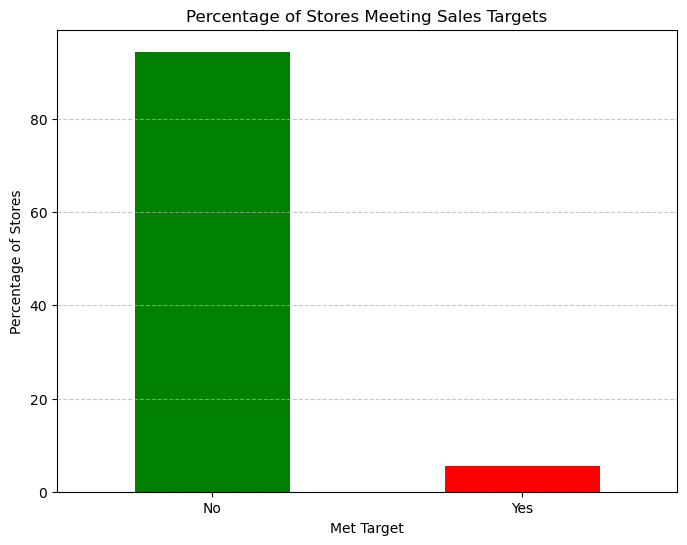

In [177]:
import matplotlib.pyplot as plt


# Count the number of stores that met and did not meet their targets
target_counts = tienda_df['MET_TARGET'].value_counts()

# Calculate the percentage
total_stores = target_counts.sum()
target_percentages = (target_counts / total_stores) * 100

# Plot the results
plt.figure(figsize=(8, 6))
target_percentages.plot(kind='bar', color=['green', 'red'])
plt.title('Percentage of Stores Meeting Sales Targets')
plt.xlabel('Met Target')
plt.ylabel('Percentage of Stores')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [178]:
target_percentages

MET_TARGET
True     94.409283
False     5.590717
Name: count, dtype: float64

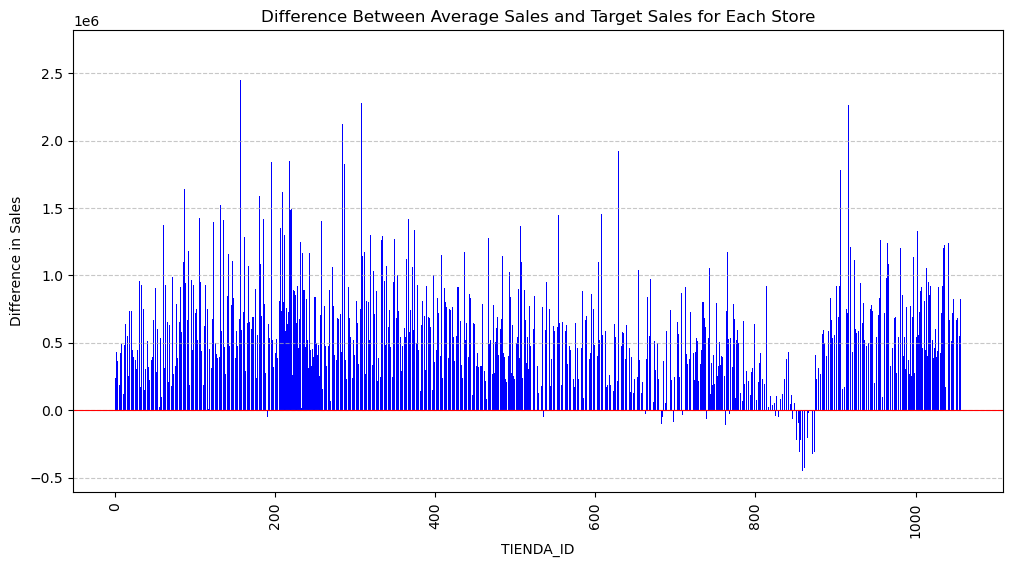

In [179]:
tienda_avg_sales_meta_df['DIFFERENCE'] = tienda_avg_sales_meta_df['AVG_VENTAS'] - tienda_avg_sales_meta_df['Meta_venta']

# Plot the differences
plt.figure(figsize=(12, 6))
plt.bar(tienda_avg_sales_meta_df['TIENDA_ID'], tienda_avg_sales_meta_df['DIFFERENCE'], color='blue')
plt.axhline(0, color='red', linewidth=0.8)  # Add a horizontal line at y=0 for reference
plt.title('Difference Between Average Sales and Target Sales for Each Store')
plt.xlabel('TIENDA_ID')
plt.ylabel('Difference in Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [180]:
ventas_df_melted

,MES_ID,TIENDA_ID,VENTAS
0,2023-01-01,1,748595.530
1,2023-02-01,1,612027.745
2,2023-03-01,1,475459.960
3,2023-04-01,1,697411.280
4,2023-05-01,1,779274.500
...,...,...,...
22108,2024-05-01,1056,1631045.100
22109,2024-06-01,1056,1455512.660
22110,2024-07-01,1056,1476933.770
22111,2024-11-01,1056,1233848.920


In [181]:
print(tienda_df.head())

   TIENDA_ID  PLAZA_CVE NIVELSOCIOECONOMICO_DES ENTORNO_DES  MTS2VENTAS_NUM  \
0        126          1                      BC       Hogar          127.42   
1        681          1                       C       Hogar          128.13   
2        117          1                       C        Base           87.62   
3        682          1                       C       Hogar           90.70   
4        275          1                       C       Hogar           95.30   

   PUERTASREFRIG_NUM  CAJONESESTACIONAMIENTO_NUM  LATITUD_NUM  LONGITUD_NUM  \
0               13.0                           7     25.69107    -100.21261   
1               13.0                           8     25.73571    -100.18086   
2               11.0                          11     25.71883    -100.19133   
3               13.0                           8     25.66952    -100.20744   
4               13.0                           6     25.73766    -100.16116   

  SEGMENTO_MAESTRO_DESC LID_UBICACION_TIENDA DATAS

In [182]:
ventas_df_melted['TIENDA_ID'] = ventas_df_melted['TIENDA_ID'].astype(str)
tienda_df['TIENDA_ID'] = tienda_df['TIENDA_ID'].astype(str)

In [183]:
unique_ventas_ids = set(ventas_df_melted['TIENDA_ID'].unique())
unique_tienda_ids = set(tienda_df['TIENDA_ID'].unique())

# Find TIENDA_IDs in ventas_df_melted not in tienda_df
missing_ids = unique_ventas_ids - unique_tienda_ids
print(tienda_df['PUERTASREFRIG_NUM'].isna().sum())
print()
print("TIENDA_IDs in ventas_df_melted not in tienda_df:", missing_ids)

0

TIENDA_IDs in ventas_df_melted not in tienda_df: {'160', '240', '690', '880', '430', '120', '1040', '130', '420', '330', '190', '460', '790', '260', '340', '450', '270', '40', '1050', '250', '500', '560', '1020', '480', '80', '940', '530', '900', '920', '760', '620', '960', '90', '590', '630', '820', '350', '720', '440', '510', '170', '910', '840', '990', '140', '540', '740', '750', '1030', '610', '400', '410', '860', '680', '1000', '1010', '570', '100', '220', '520', '600', '110', '180', '20', '310', '30', '370', '490', '580', '320', '970', '810', '10', '380', '230', '300', '670', '50', '150', '800', '290', '210', '550', '70', '890', '850', '200', '770', '360', '930', '780', '640', '470', '60', '660', '730', '280', '390', '870', '710', '980', '950', '650', '700', '830'}


In [193]:
tienda_df.to_csv('tienda_df_alex.csv', index=False)


In [194]:
tienda_df.columns


Index(['TIENDA_ID', 'PLAZA_CVE', 'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES',
       'MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM',
       'LATITUD_NUM', 'LONGITUD_NUM', 'SEGMENTO_MAESTRO_DESC',
       'LID_UBICACION_TIENDA', 'DATASET', 'MET_TARGET', 'AVG_VENTAS'],
      dtype='object')

In [184]:
common_df = pd.merge(
    ventas_df_melted,   # ← your sales table
    tienda_df,          # ← your store‐metadata table
    on='TIENDA_ID',
    how='inner',
    suffixes=('_venta','_tienda')
)


In [185]:
print("Common has:", common_df.shape)
print(common_df[['TIENDA_ID','VENTAS','PUERTASREFRIG_NUM']].head())
print("Nulls in refrigerador after merge:",
      common_df['PUERTASREFRIG_NUM'].isna().sum())


Common has: (19908, 16)
  TIENDA_ID      VENTAS  PUERTASREFRIG_NUM
0         1  748595.530               13.0
1         1  612027.745               13.0
2         1  475459.960               13.0
3         1  697411.280               13.0
4         1  779274.500               13.0
Nulls in refrigerador after merge: 0


In [186]:
common_df.head()

,MES_ID,TIENDA_ID,VENTAS,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MET_TARGET,AVG_VENTAS
0,2023-01-01,1,748595.530,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
1,2023-02-01,1,612027.745,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
2,2023-03-01,1,475459.960,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
3,2023-04-01,1,697411.280,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
4,2023-05-01,1,779274.500,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381


In [187]:
import pandas as pd

# 1. Quick info: column names, non-null counts, types
print(common_df.info())

# 2. First few rows to sanity-check structure
print(common_df.head())

# 3. List of dtypes per column
print("\nData types:\n", common_df.dtypes)

# 4. Count of missing values per column
print("\nMissing values per column:\n", common_df.isnull().sum())

# 5. Number of unique values per column
print("\nUnique values per column:\n", common_df.nunique())

# 6. Descriptive statistics for numeric columns
print("\nNumeric summary:\n", common_df.describe())

# 7. Descriptive statistics for object/categorical columns
print("\nCategorical summary:\n", common_df.describe(include=['object','category']))

# 8. (Optional) Compile into a single table
col_summary = pd.DataFrame({
    'dtype':       common_df.dtypes,
    'non-null':    common_df.count(),
    'nulls':       common_df.isnull().sum(),
    'unique':      common_df.nunique()
})
print("\nColumn summary table:\n", col_summary)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MES_ID                      19908 non-null  object 
 1   TIENDA_ID                   19908 non-null  object 
 2   VENTAS                      19908 non-null  float64
 3   PLAZA_CVE                   19908 non-null  int64  
 4   NIVELSOCIOECONOMICO_DES     19908 non-null  object 
 5   ENTORNO_DES                 19908 non-null  object 
 6   MTS2VENTAS_NUM              19908 non-null  float64
 7   PUERTASREFRIG_NUM           19908 non-null  float64
 8   CAJONESESTACIONAMIENTO_NUM  19908 non-null  int64  
 9   LATITUD_NUM                 19908 non-null  float64
 10  LONGITUD_NUM                19908 non-null  float64
 11  SEGMENTO_MAESTRO_DESC       19908 non-null  object 
 12  LID_UBICACION_TIENDA        19908 non-null  object 
 13  DATASET                     199

In [188]:
import numpy as np

# 1. Treat zeros as missing
common_df['LATITUD_NUM'].replace(0, np.nan, inplace=True)
common_df['LONGITUD_NUM'].replace(0, np.nan, inplace=True)

# 2. Fill missing coords from other rows of the same TIENDA_ID
common_df['LATITUD_NUM'] = (
    common_df
    .groupby('TIENDA_ID')['LATITUD_NUM']
    .transform(lambda x: x.ffill().bfill())
)
common_df['LONGITUD_NUM'] = (
    common_df
    .groupby('TIENDA_ID')['LONGITUD_NUM']
    .transform(lambda x: x.ffill().bfill())
)

# 3. Check how many rows still have missing coords
remaining_rows_missing = common_df[
    common_df['LATITUD_NUM'].isna() | common_df['LONGITUD_NUM'].isna()
].shape[0]
print(f"Rows still missing either LAT or LON: {remaining_rows_missing}")

# 4. Check how many stores have no valid coords at all
store_missing = common_df.groupby('TIENDA_ID').apply(
    lambda df: df['LATITUD_NUM'].isna().all() or df['LONGITUD_NUM'].isna().all()
)
num_stores_missing = store_missing.sum()
total_stores = store_missing.size
print(f"Stores with no coords at all: {num_stores_missing} / {total_stores}")


Rows still missing either LAT or LON: 42
Stores with no coords at all: 2 / 948


In [189]:
# 1. Build a mask for rows with NaN or 0 in either coord
mask_missing = (
    common_df['LATITUD_NUM'].isna() |
    common_df['LONGITUD_NUM'].isna() |
    (common_df['LATITUD_NUM'] == 0) |
    (common_df['LONGITUD_NUM'] == 0)
)

# 2. Extract those rows
remaining = common_df[mask_missing]

# 3. Report how many rows remain problematic
print("Rows still with missing or zero coords:", remaining.shape[0])

# 4. Show the unique stores that still lack valid coords
stores_missing = remaining['TIENDA_ID'].unique()
print(f"Stores with remaining bad coords ({len(stores_missing)}):", stores_missing)

# 5. (Optional) peek at a few
print("\nSample problematic rows:")
print(remaining[['TIENDA_ID','MES_ID','LATITUD_NUM','LONGITUD_NUM']].drop_duplicates().head())


Rows still with missing or zero coords: 42
Stores with remaining bad coords (2): ['857' '858']

Sample problematic rows:
      TIENDA_ID      MES_ID  LATITUD_NUM  LONGITUD_NUM
16170       857  2023-01-01          NaN           NaN
16171       857  2023-02-01          NaN           NaN
16172       857  2023-03-01          NaN           NaN
16173       857  2023-04-01          NaN           NaN
16174       857  2023-05-01          NaN           NaN


In [190]:
# If TIENDA_ID is object-typed strings, list them as strings:
stores_to_drop = ['857', '858']

# Otherwise, if they’re ints, use:
# stores_to_drop = [857, 858]

# 1. Filter them out
common_df = common_df[~common_df['TIENDA_ID'].isin(stores_to_drop)]

# 2. Quick sanity checks
print("Remaining unique stores:", common_df['TIENDA_ID'].nunique())
print("Remaining rows:", len(common_df))
print("Any missing coords now:",
      common_df['LATITUD_NUM'].isna().sum() + common_df['LONGITUD_NUM'].isna().sum())


Remaining unique stores: 946
Remaining rows: 19866
Any missing coords now: 0


## Dropped stores 857, 858 due to no location 

In [191]:
print(common_df.head())

       MES_ID TIENDA_ID      VENTAS  PLAZA_CVE NIVELSOCIOECONOMICO_DES  \
0  2023-01-01         1  748595.530          2                       C   
1  2023-02-01         1  612027.745          2                       C   
2  2023-03-01         1  475459.960          2                       C   
3  2023-04-01         1  697411.280          2                       C   
4  2023-05-01         1  779274.500          2                       C   

  ENTORNO_DES  MTS2VENTAS_NUM  PUERTASREFRIG_NUM  CAJONESESTACIONAMIENTO_NUM  \
0       Hogar       109.73693               13.0                           8   
1       Hogar       109.73693               13.0                           8   
2       Hogar       109.73693               13.0                           8   
3       Hogar       109.73693               13.0                           8   
4       Hogar       109.73693               13.0                           8   

   LATITUD_NUM  LONGITUD_NUM SEGMENTO_MAESTRO_DESC LID_UBICACION_TIENDA  \

In [192]:
common_df.to_csv('cleaned_common_df.csv', index=False)


In [195]:
# Suponiendo que common_df es el DataFrame combinado
tienda_df_columns = [
    'TIENDA_ID', 'PLAZA_CVE', 'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES',
    'MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM',
    'LATITUD_NUM', 'LONGITUD_NUM', 'SEGMENTO_MAESTRO_DESC',
    'LID_UBICACION_TIENDA', 'DATASET', 'MET_TARGET', 'AVG_VENTAS'
]

# Recuperar tienda_df
tienda_df_recovered = common_df[tienda_df_columns]

In [196]:
tienda_df_recovered.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,MET_TARGET,AVG_VENTAS
0,1,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
1,1,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
2,1,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
3,1,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381
4,1,2,C,Hogar,109.73693,13.0,8,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,True,729775.317381


In [198]:
# Obtener solo los valores únicos de tienda_df_recovered
tienda_df_unique = tienda_df_recovered.drop_duplicates()
tienda_df_unique.head()
# Save the unique values of tienda_df_recovered to a CSV file
tienda_df_unique.to_csv('tienda_limpio_bueno.csv', index=False)
